In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import pickle

# Function to predict top similar movies
def predict(title, similarity_weight=0.7, top_n=10):
    try:
        # Load the content dataframe
        content_df = pd.read_csv("content_df.csv")
        
        # Load the cosine similarity matrix
        with open('cosine_similarity1.pkl', 'rb') as f:
            cos_sim = pickle.load(f)
        
        # Reset index of content_df DataFrame
        data = content_df.reset_index()
        
        # Get the index of the movie with the given title
        index_movie = data[data['original_title'] == title].index
        
        # Transpose cosine similarity matrix to get similarities for the given movie
        similarity = cos_sim[index_movie].T
        
        # Create a DataFrame containing similarity scores
        sim_df = pd.DataFrame(similarity, columns=['similarity'])
        
        # Concatenate the similarity DataFrame with the data DataFrame
        final_df = pd.concat([data, sim_df], axis=1)
        
        # Calculate final score using similarity_weight
        final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight
        
        # Sort DataFrame based on final score in descending order and select top_n movies
        final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
        
        # Set 'original_title' as index
        final_df_sorted.set_index('original_title', inplace=True)
        
        # Remove the 'score' column
        final_df_sorted.drop(columns=['score','final_score','weighted_average','bag_of_words'], inplace=True)
        
        return final_df_sorted
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Function to handle button click event
def get_recommendations():
    try:
        title = movie_title_entry.get()
        similarity_weight = float(similarity_weight_entry.get())
        top_n = int(top_n_entry.get())
        
        recommendations = predict(title, similarity_weight, top_n)
        result_text = recommendations.to_string()
        result_label.config(text=result_text)
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create Tkinter window
root = tk.Tk()
root.title("Movie Recommendation System")

# Movie title entry
movie_title_label = tk.Label(root, text="Enter Movie Title:")
movie_title_label.pack()
movie_title_entry = tk.Entry(root)
movie_title_entry.pack()

# Similarity weight entry
similarity_weight_label = tk.Label(root, text="Similarity Weight (0-1):")
similarity_weight_label.pack()
similarity_weight_entry = tk.Entry(root)
similarity_weight_entry.pack()

# Top N entry
top_n_label = tk.Label(root, text="Top N Movies:")
top_n_label.pack()
top_n_entry = tk.Entry(root)
top_n_entry.pack()

# Button to get recommendations
predict_button = tk.Button(root, text="Get Recommendations", command=get_recommendations)
predict_button.pack()

# Label to display recommendations
result_label = tk.Label(root, text="")
result_label.pack()

# Run Tkinter event loop
root.mainloop()


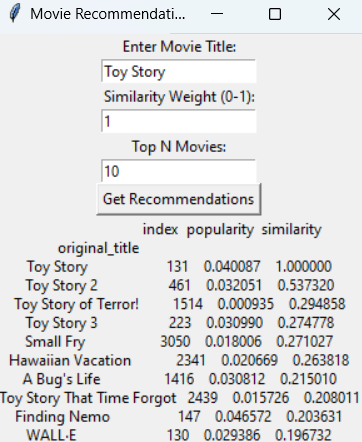
